In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
data = pd.read_csv('../data-preprocessing/data/processed/titanic_preprocessed.csv')
data.head()

X = data.drop('Survived', axis=1) # We `drop` the target column from features
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets 20% test size 80% train size


In [29]:
# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.7989
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



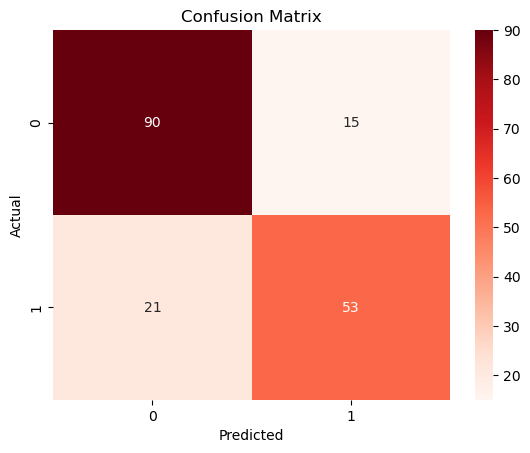

In [ ]:
#Evaluating the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Accuracy: how many predictions were correct
# Precision: of all positive predictions, how many were actually positive
# Recall: of all actual positives, how many were correctly predicted
# F1-Score: harmonic mean of precision and recall

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Confusion Matrix: actual vs predicted shows counts of TN, FP, FN, TP
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

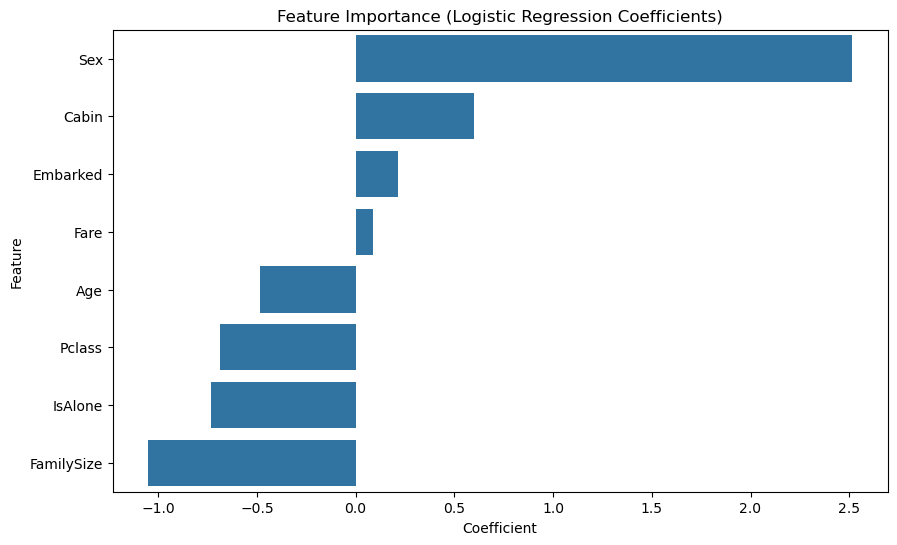

In [ ]:
# Feature Importance: coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature')
plt.title("Feature Importance (Logistic Regression Coefficients)") 
plt.show()